<a href="https://colab.research.google.com/github/kianakiaei/TensorFlow/blob/main/neural_network_regression_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

## Create your own regression dataset (or make the one we created in "Create data to view and fit" bigger) and build fit a model to it.

In [22]:
# x = a
# y = a^2+1

x = tf.constant([-50, -45, -40, -35, -30, -25, -20, -15, -10, -5, 0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50])
y = tf.constant(tf.pow(x, 2) + 1)

In [23]:
y

<tf.Tensor: shape=(21,), dtype=int32, numpy=
array([2501, 2026, 1601, 1226,  901,  626,  401,  226,  101,   26,    1,
         26,  101,  226,  401,  626,  901, 1226, 1601, 2026, 2501],
      dtype=int32)>

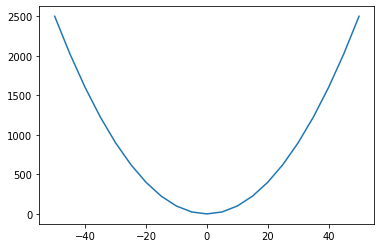

In [24]:
plt.plot(x, y)

In [25]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential(
                     tf.keras.layers.Dense(1)
)

model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

model_1.fit(x, y, epochs=100, verbose=0)

In [26]:
model_1.evaluate(x, y)

1/1 [==============================] - 0s 91ms/step - loss: 917.5666 - mae: 917.5666


[917.5665893554688, 917.5665893554688]

In [27]:
model_1.predict([3])

# We expect 10

array([[1.8033158]], dtype=float32)

## Try building a neural network with 4 Dense layers and fitting it to your own regression dataset, how does it perform?

In [28]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
                     tf.keras.layers.Dense(100),
                     tf.keras.layers.Dense(60),
                     tf.keras.layers.Dense(30),
                     tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

model_2.fit(x, y, epochs=100, verbose=0)

In [29]:
model_2.evaluate(x, y)

1/1 [==============================] - 0s 98ms/step - loss: 779.1921 - mae: 779.1921


[779.1920776367188, 779.1920776367188]

In [30]:
model_2.predict([3])

# Overfitting happend

array([[216.89273]], dtype=float32)

## Try and improve the results we got on the insurance dataset, some things you might want to try include:

* Building a larger model (how does one with 4 dense layers go?).
* Increasing the number of units in each layer.
*Lookup the documentation of Adam and find out what the first parameter is, what happens if you increase it by 10x?
* What happens if you train for longer (say 300 epochs instead of 200)?

In [31]:
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [32]:
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [33]:
x = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [35]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
                     tf.keras.layers.Dense(100),
                     tf.keras.layers.Dense(100),
                     tf.keras.layers.Dense(100),
                     tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
                metrics=["mae"])

model_3.fit(x_train, y_train, epochs=300, verbose=0)

In [36]:
model_3.evaluate(x_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3579.8176 - mae: 3579.8176


[3579.817626953125, 3579.817626953125]

## Import the Boston pricing dataset from TensorFlow tf.keras.datasets and model it.

In [42]:
from tensorflow.keras.datasets import boston_housing

# The data has already been sorted into training and test sets for us
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

In [45]:
x_train

array([[1.23247e+00, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
        3.96900e+02, 1.87200e+01],
       [2.17700e-02, 8.25000e+01, 2.03000e+00, ..., 1.47000e+01,
        3.95380e+02, 3.11000e+00],
       [4.89822e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.75520e+02, 3.26000e+00],
       ...,
       [3.46600e-02, 3.50000e+01, 6.06000e+00, ..., 1.69000e+01,
        3.62250e+02, 7.83000e+00],
       [2.14918e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
        2.61950e+02, 1.57900e+01],
       [1.43900e-02, 6.00000e+01, 2.93000e+00, ..., 1.56000e+01,
        3.76700e+02, 4.38000e+00]])

In [43]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
                     tf.keras.layers.Dense(100),
                     tf.keras.layers.Dense(1)
])

model_4.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
                metrics=["mae"])

model_4.fit(x_train, y_train, epochs=300, verbose=0)

In [44]:
model_4.evaluate(x_test, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 3.3661 - mae: 3.3661


[3.366107940673828, 3.366107940673828]